In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
# import seaborn as sns
# TODO: redo this with seaborn?

from barplot_brackets import *
from barplot_group_means import *

In [31]:
'''# TODO

# 
# something clever with deciding which/all sessions to look at

# data_folder = "./data/"
# group = "ee1"
# session = "2cfrt"
# scorer = "mel"

# ee1_vns = [2,3,6,7,9,11]
# ee1_sham = [1,4,5,8,10]
# ee1_exclude = []

# ee2_vns = [1,3,6,8,9]
# ee2_sham = [2,4,5,7,10]
# ee2_exclude = [ 6 ] # cuff problems

# vns_color = 'blue'
# sham_color = 'red'



#---- PROBABLY TRASH
# sessions = { # true for session(s) to graph.
#     "1AFC"   : True,
#     "2CRFT"  : False,
#     "3EXT1"  : False,
#     "4EXT2"  : False,
#     "5RET"   : False,
#     "6SR1"   : False,
#     "7SR2"   : False,
#     "8REN"   : False,
#     "9RST"   : False
# }'''

'# TODO\n\n# \n# something clever with deciding which/all sessions to look at\n\n# data_folder = "./data/"\n# group = "ee1"\n# session = "2cfrt"\n# scorer = "mel"\n\n# ee1_vns = [2,3,6,7,9,11]\n# ee1_sham = [1,4,5,8,10]\n# ee1_exclude = []\n\n# ee2_vns = [1,3,6,8,9]\n# ee2_sham = [2,4,5,7,10]\n# ee2_exclude = [ 6 ] # cuff problems\n\n# vns_color = \'blue\'\n# sham_color = \'red\'\n\n\n\n#---- PROBABLY TRASH\n# sessions = { # true for session(s) to graph.\n#     "1AFC"   : True,\n#     "2CRFT"  : False,\n#     "3EXT1"  : False,\n#     "4EXT2"  : False,\n#     "5RET"   : False,\n#     "6SR1"   : False,\n#     "7SR2"   : False,\n#     "8REN"   : False,\n#     "9RST"   : False\n# }'

In [32]:
# TODO: stats
# see https://scipy-lectures.org/packages/statistics/index.html#student-s-t-test-the-simplest-statistical-test

In [33]:
session_data = "./data/ee1/ee1-1afc-mel.csv"
session="AFC"

vns = [2,3,6,7,9,11]
sham = [1,4,5,8,10]

vns_color = 'red'
sham_color = 'blue'

time_per_trial = 30  # length of each trial in seconds

In [34]:
df = pd.read_csv(session_data)
df.set_index("RAT",inplace=True)

df = 100 * df / time_per_trial  # change into percents

# sessions with baseline.
# try:
#     bl_df = df.loc[:,['BL1','BL2']]  # new df for just baseline
#     df = df.loc[:, ~df.columns.isin(['BL1','BL2'])]  # remove bl from df
# except KeyError:
#     pass

In [35]:
# total session means, for bar plot

all_means = df.mean(axis=1,numeric_only=True)

vns_means = all_means.loc[vns]
sham_means = all_means.loc[sham]

In [36]:
# barplot of group means for all trials

# barplot_group_means(
#     x=(1,3),
#     y=(vns_means,sham_means),
#     lbls=("VNS","SHAM"),
#     colors=(vns_color,sham_color),
#     w=1,
#     p=.5
# )

In [37]:
# Bins of 2 trials

df_bins = pd.DataFrame(index=df.index)

bl_sessions = [s for s in df.columns if "BL" in s.upper()]  # count number of baseline sessions in data

bl_bins = int(len(bl_sessions)/2)
bins = int(df.shape[1] / 2) - bl_bins

# binning baseline sessions
for i in range(0,bl_bins):
    a = "BL"+str(2*i+1)
    b = "BL"+str((2*i)+2)
    
    trial = 1-(bl_bins-i)  # bl bins are called -(n-1) to 0; n= # bl bins

    df_bins[trial] = df.loc[:,a:b].mean(axis=1)

# bins
for i in range(0,bins):
    a = str((2*i)+1)
    b = str((2*i)+2)

    trial = i+1

    df_bins[trial] = df.loc[:,a:b].mean(axis=1)

In [45]:
data = [df_bins.loc[vns], df_bins.loc[sham]]
group_labels = ["VNS","SHAM"]

group_mean_by_bin = [group_df.mean() for group_df in data]
group_error_by_bin = [group_df.sem() for group_df in data]

group_colors = [vns_color, sham_color]

show_significance=True

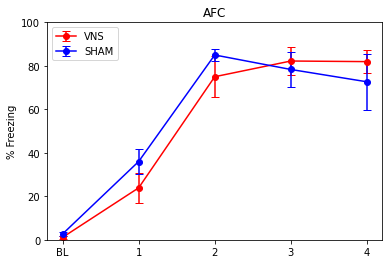

In [44]:
fig, ax = plt.subplots()

# TODO: make into function

for grp_i in range(0,len(group_mean_by_bin)):
    ax.errorbar(
        x=group_mean_by_bin[grp_i].index,
        y=group_mean_by_bin[grp_i],
        yerr=group_error_by_bin[grp_i],
        label=group_labels[grp_i],
        color=group_colors[grp_i],
        marker=".", markersize=12,
        capsize=4,
    )

ax.set(
    title=session,
    xticks=list(group_mean_by_bin[0].index),  #[i for i in range(1,len(group_mean_by_bin[0])+1)],
    ylim=[0,100],
    ylabel= "% Freezing"
)

# TODO: significance
p_vals = stats.ttest_ind(data[0],data[1])[1]

if show_significance:
    for p in p_vals:
        if p > 0.05:
            continue
        elif p == 0.05:
            trial_label = "p=0.05"
        else:
            get_sig_stars(p)
            


# Labelling BL sessions
x_labels = []
for c in group_mean_by_bin[0].index:
    if c<=0:  # for BL bins
        if bl_bins==1:  # label "BL" if only 1
            x_labels.append("BL")
        else:  # else, label "BL1" thru "BL#"
            x_labels.append("BL"+str(c+bl_bins))
    else:
        x_labels.append(str(c))

ax.set_xticklabels(
    labels = x_labels
)

ax.legend()
plt.savefig('EX-afc-lm')
plt.show(fig)

In [41]:
plt.savefig('EX-lm-afc.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
def get_sig_stars(p):
    if p<0.05 and p>=.005:
        return "*"
    elif p<.005 and p>= .0005:
        return "**"
    else:
        return "***"